In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv('C:/Users/agni.qa.AGNI.000/Desktop/Cancer Data/corona_tested_individuals_ver_006.english.csv')
covid.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [3]:
covid.describe()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,51,5,5,5,5,5,3,3,3,3
top,2020-04-20,0,0,0,0,0,negative,None,female,Other
freq,10921,121649,133942,260664,261079,260079,260227,127320,130158,242741


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 10.6+ MB


In [5]:
covid.shape

(278848, 10)

In [6]:
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [7]:
covid

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other
...,...,...,...,...,...,...,...,...,...,...
278843,2020-03-11,0,0,0,0,0,negative,None,None,Other
278844,2020-03-11,0,0,0,0,0,negative,None,None,Other
278845,2020-03-11,0,0,0,0,0,positive,None,None,Contact with confirmed
278846,2020-03-11,0,0,0,0,0,other,None,None,Other


In [8]:
covid =  covid.drop('test_date',axis=1)
covid.head(2)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other


In [9]:
covid['corona_result'].value_counts()

negative    260227
positive     14729
other         3892
Name: corona_result, dtype: int64

In [10]:
covid.drop(covid.index[covid['corona_result'] == 'other'], inplace = True)
covid['corona_result'].value_counts()

negative    260227
positive     14729
Name: corona_result, dtype: int64

In [11]:
covid['cough'].value_counts()

0       119702
0       113431
1        25547
1        16024
None       252
Name: cough, dtype: int64

In [12]:
covid['cough'] = covid['cough'].map({'0': 0, '1': 1, 'None': 0})
covid['cough'].value_counts()

0.0    119954
1.0     25547
Name: cough, dtype: int64

In [13]:
covid['fever'].value_counts()

0       131874
0       121455
1        13375
1         8000
None       252
Name: fever, dtype: int64

In [14]:
covid['fever'] = covid['fever'].map({'0': 0, '1': 1, 'None': 0})

# display changes
covid['fever'].value_counts()

0.0    132126
1.0     13375
Name: fever, dtype: int64

In [15]:
covid['sore_throat'].value_counts()

0       257090
0        15973
1         1458
1          434
None         1
Name: sore_throat, dtype: int64

In [16]:
covid['sore_throat'] = covid['sore_throat'].map({'0': 0, '1': 1, 'None': 0})
covid['sore_throat'].value_counts()

0.0    15974
1.0      434
Name: sore_throat, dtype: int64

In [17]:
covid['shortness_of_breath'].value_counts()

0       257500
0        15906
1         1048
1          501
None         1
Name: shortness_of_breath, dtype: int64

In [18]:
covid['shortness_of_breath'] = covid['shortness_of_breath'].map({'0': 0, '1': 1, 'None': 0})
covid['shortness_of_breath'].value_counts()

0.0    15907
1.0      501
Name: shortness_of_breath, dtype: int64

In [19]:
covid['head_ache'].value_counts()

0       256508
0        16064
1         2040
1          343
None         1
Name: head_ache, dtype: int64

In [20]:
covid['head_ache'] = covid['head_ache'].map({'0': 0, '1': 1, 'None': 0})
covid['head_ache'].value_counts()


0.0    16065
1.0      343
Name: head_ache, dtype: int64

In [21]:
covid['age_60_and_above'].value_counts()

None    125664
No      123867
Yes      25425
Name: age_60_and_above, dtype: int64

In [22]:
covid['age_60_and_above'] = covid['age_60_and_above'].map({'No':0,'Yes':1,'None':0})
covid['age_60_and_above'].value_counts()

0    249531
1     25425
Name: age_60_and_above, dtype: int64

In [23]:
covid['gender'] = covid['gender'].map({'male': 1, 'female': 0})

In [24]:
covid['corona_result'] = covid['corona_result'].map({'positive': 1, 'negative': 0})

In [25]:
covid['corona_result'].value_counts()

0    260227
1     14729
Name: corona_result, dtype: int64

In [26]:
covid.dtypes

cough                  float64
fever                  float64
sore_throat            float64
shortness_of_breath    float64
head_ache              float64
corona_result            int64
age_60_and_above         int64
gender                 float64
test_indication         object
dtype: object

In [27]:
covid = covid.drop(['test_indication'],axis=1)
covid.head(2)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,NaN,NaN,NaN,NaN,NaN,0,0,0.0
1,NaN,NaN,NaN,NaN,NaN,0,0,0.0


In [28]:
covid.shape

(274956, 8)

In [29]:
covid = covid.dropna()

In [30]:
covid.shape

(2897, 8)

In [31]:
covid.head(2)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
262144,0.0,0.0,0.0,0.0,0.0,0,0,0.0
262145,0.0,0.0,0.0,0.0,0.0,0,1,0.0


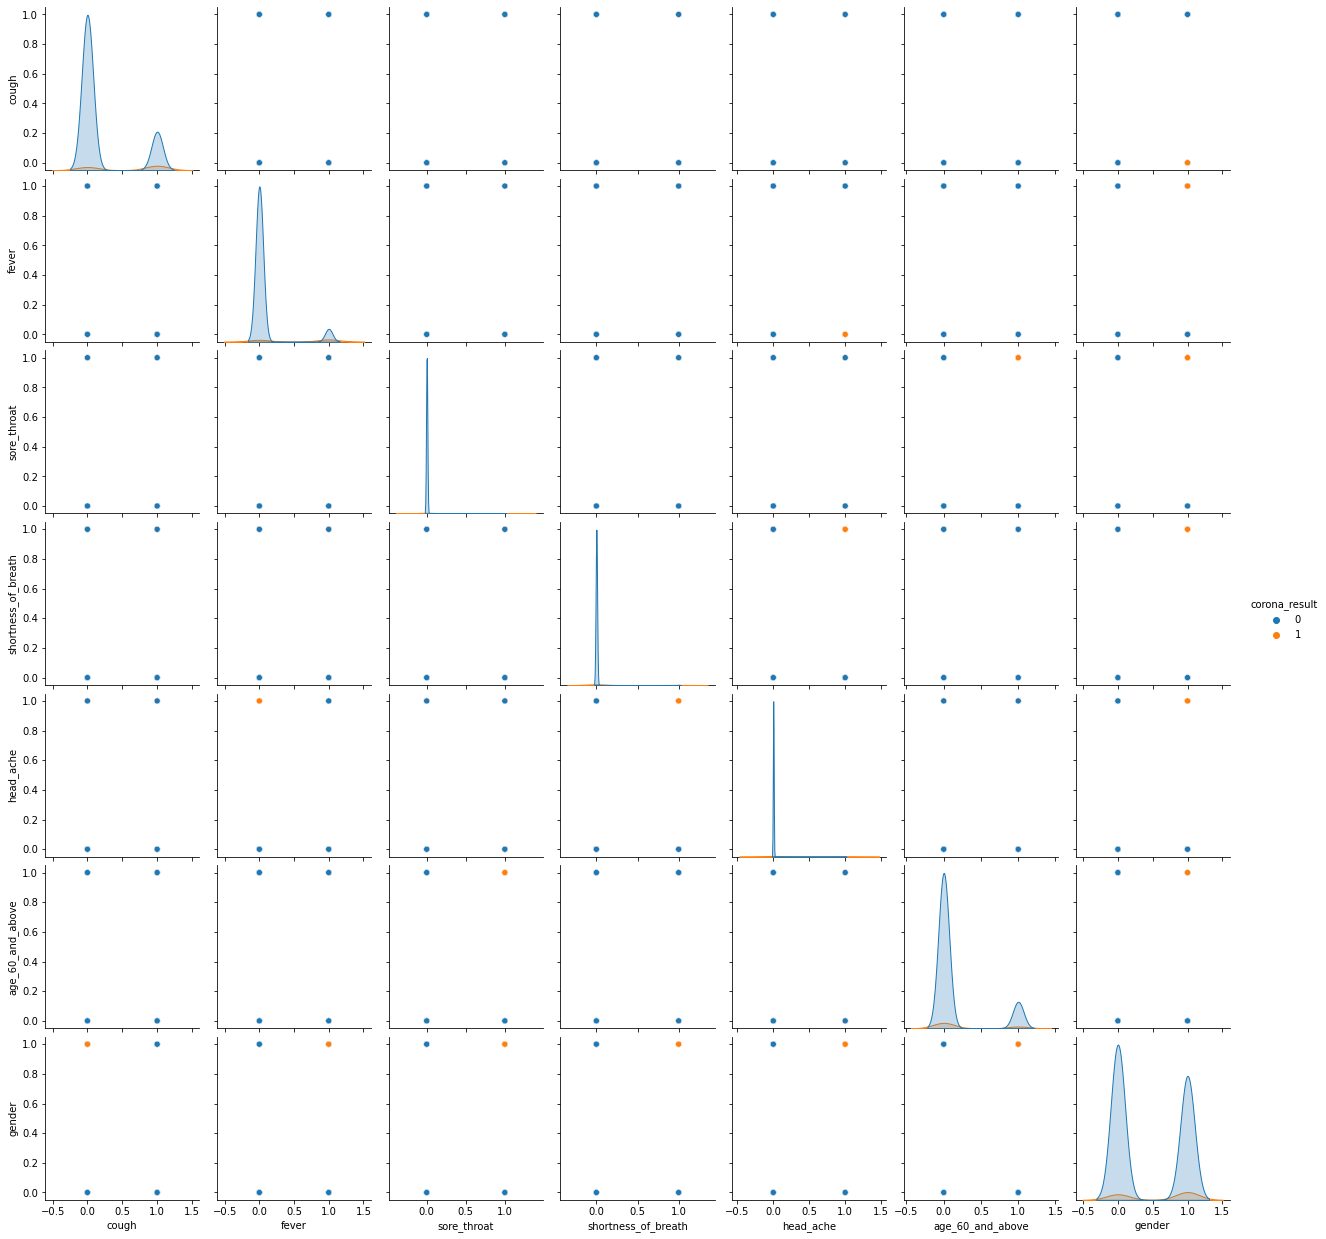

In [32]:
sn.pairplot(covid,hue='corona_result')

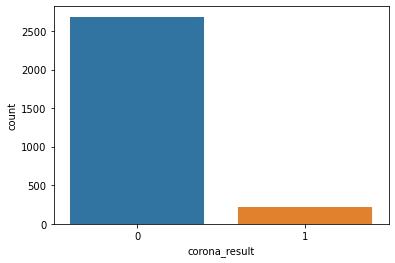

In [33]:
sn.countplot(covid["corona_result"]);

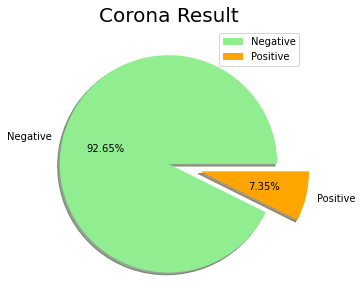

In [34]:
labels = ['Negative', 'Positive']
size = covid['corona_result'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.3]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Corona Result', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

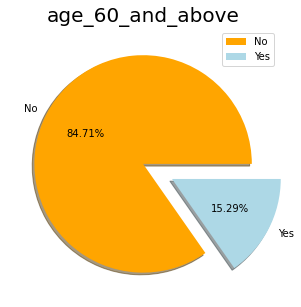

In [35]:
labels = ['No', 'Yes']
size = covid['age_60_and_above'].value_counts()
colors = ['orange', 'lightblue']
explode = [0, 0.3]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('age_60_and_above', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

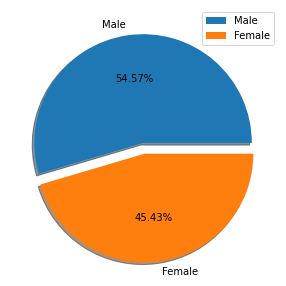

In [36]:
plt.figure(figsize=[5,5])
plt.pie(covid["gender"].value_counts(),explode=[0.0,0.1],labels=['Male','Female'],autopct='%0.02f%%',shadow = True)
plt.legend()
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = covid.drop(['corona_result'],axis=1)
y = covid['corona_result']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
Decissiontree_score_train = dt.score(x_train,y_train)
Decissiontree_score_test = dt.score(x_test,y_test)

In [42]:
print('Accuracy of Decission Tree Trianing score is :',Decissiontree_score_train*100,'%')
print('\n')
print('Accuracy of Decission Tree Test score is :',Decissiontree_score_test*100,'%')

Accuracy of Decission Tree Trianing score is : 96.59595461272818 %


Accuracy of Decission Tree Test score is : 94.94252873563218 %


In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
Randomforest_score_train = rf.score(x_train,y_train)
Randomforest_score_test = rf.score(x_test,y_test)

In [44]:
print('Accuracy of Random Forest Trianing score is :',Randomforest_score_train*100,'%')
print('\n')
print('Accuracy of Random Forest Test score is :',Randomforest_score_test*100,'%')

Accuracy of Random Forest Trianing score is : 96.59595461272818 %


Accuracy of Random Forest Test score is : 95.05747126436782 %


In [45]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
Logisticregression_score_train = lr.score(x_train,y_train)
Logisticregression_score_test = lr.score(x_test,y_test)

In [46]:
print('Accuracy of Logistic Regression Trianing score is :',Logisticregression_score_train*100,'%')
print('\n')
print('Accuracy of Logistic Regression Test score is :',Logisticregression_score_test*100,'%')

Accuracy of Logistic Regression Trianing score is : 95.9546127281697 %


Accuracy of Logistic Regression Test score is : 94.94252873563218 %


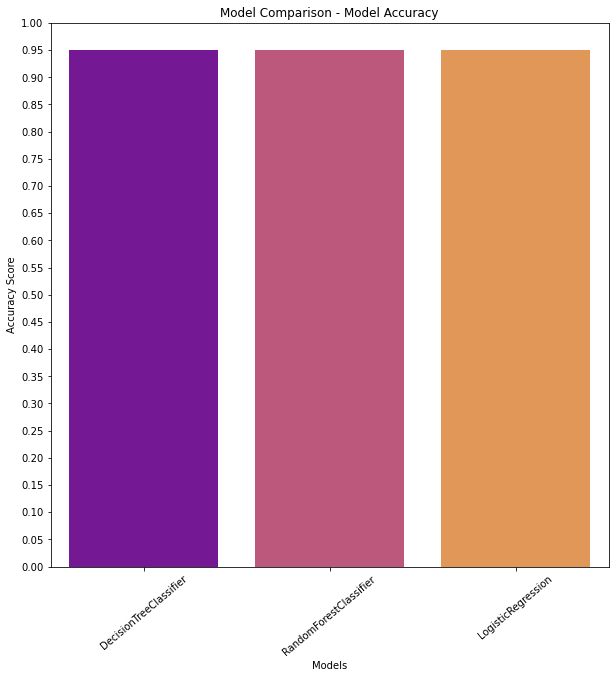

In [47]:
x =['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
y = [Decissiontree_score_test,Randomforest_score_test,Logisticregression_score_test]

plt.figure(figsize=(10,10))
sn.barplot(x=x,y=y, palette="plasma")
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=40)
plt.yticks(np.arange(0, 1.01, step=0.05))
plt.title("Model Comparison - Model Accuracy")
plt.show()

In [48]:
covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
262144,0.0,0.0,0.0,0.0,0.0,0,0,0.0
262145,0.0,0.0,0.0,0.0,0.0,0,1,0.0
262146,1.0,1.0,0.0,0.0,0.0,0,0,1.0
262147,0.0,0.0,0.0,0.0,0.0,0,0,0.0
262148,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
def Covid_prediction():
    model = lr
    cough = int(input('Cough (Yes:1 / No :0): '))
    fever = int(input('Fever (Yes:1 / No :0): '))
    sore_throat = int(input('sore_throat (Yes:1 / No :0): '))
    shortness_of_breath = int(input('shortness_of_breath (Yes:1 / No :0): '))
    head_ache = int(input('head_ache (Yes:1 / No :0): '))
    age_60_and_above = int(input('age_60_and_above (Above :1 / Below :0): '))
    gender = int(input('gender (Male:1 / Female:0): '))

    predicted = model.predict([[cough, fever, sore_throat, shortness_of_breath, head_ache ,age_60_and_above, gender]])


    if predicted == 0:
        output = 'Negative'
    else:
        output = 'Positive'

    print('')
    print(f'The COVID status of the patient is {output}')


In [52]:
Covid_prediction()

Cough (Yes:1 / No :0): 0
Fever (Yes:1 / No :0): 1
sore_throat (Yes:1 / No :0): 0
shortness_of_breath (Yes:1 / No :0): 0
head_ache (Yes:1 / No :0): 1
age_60_and_above (Above :1 / Below :0): 0
gender (Male:1 / Female:0): 0

The COVID status of the patient is Positive


In [53]:
Covid_prediction()

Cough (Yes:1 / No :0): 1
Fever (Yes:1 / No :0): 0
sore_throat (Yes:1 / No :0): 1
shortness_of_breath (Yes:1 / No :0): 1
head_ache (Yes:1 / No :0): 0
age_60_and_above (Above :1 / Below :0): 1
gender (Male:1 / Female:0): 1

The COVID status of the patient is Positive


In [54]:
Covid_prediction()

Cough (Yes:1 / No :0): 0
Fever (Yes:1 / No :0): 0
sore_throat (Yes:1 / No :0): 0
shortness_of_breath (Yes:1 / No :0): 0
head_ache (Yes:1 / No :0): 0
age_60_and_above (Above :1 / Below :0): 0
gender (Male:1 / Female:0): 0

The COVID status of the patient is Negative
